# Total precipitation - default ecCharts style

This is a single cell notebook to demonstrate precipitation plotting with default ecCharts style.

If you want to plot your data exactly as in ecCharts you can tell Magics to use default ecCharts style.   

Note that units for total precipitation are meters, but here we are plotting them in milimeters. It is Magics that is doing the scaling in the background for us.

### Installing Magics

If you don't have Magics installed, run the next cell to install Magics using conda.

In [ ]:
# Install Magics in the current Jupyter kernel
import sys
!conda install --yes --prefix {sys.prefix} Magics

### Important parameters

Visualisation of our data is controlled using [**mcont**](https://confluence.ecmwf.int/display/MAGP/Contouring) function.  

To set the default ecCharts style the only parameter you need is **contour_automatic_setting** to be set to **'ecmwf'** and Magics will apply the style if there is one.

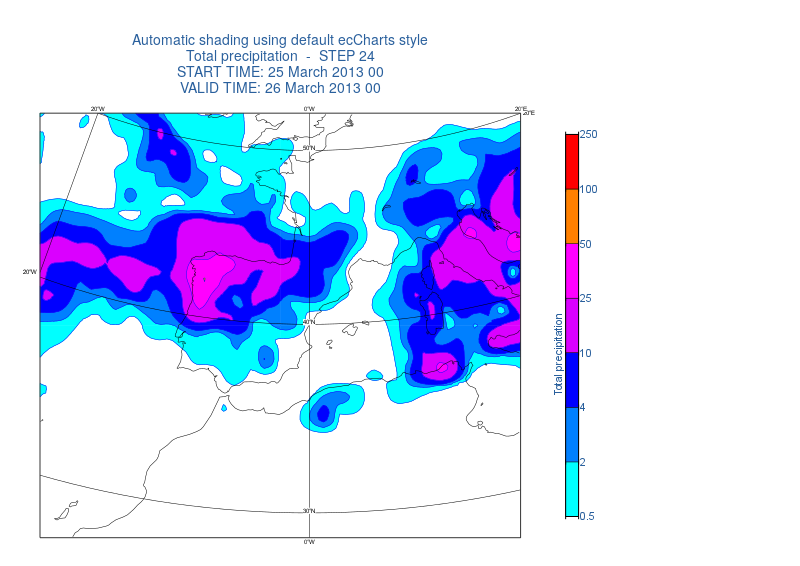

In [1]:
import Magics.macro as magics

#Setting the geographical area
projection = magics.mmap(
    subpage_map_library_area = "on",
    subpage_map_area_name    = "south_west_europe",
    page_id_line             = "off"
)

#Setting the coastline
coast = magics.mcoast()

#Loading GRIB file
precipitation = magics.mgrib(grib_input_file_name = "../../data/total_precipitation.grib")

#Defining the contour
contour = magics.mcont(contour_automatic_setting = "ecmwf",
                       legend = 'on') 

#Defining the legend
legend = magics.mlegend(
    legend_display_type       = "continuous",
    legend_automatic_position = "right",
    legend_title              = "on",
    legend_title_text         = "Total precipitation",
    legend_text_font_size     = "0.45",
    legend_text_colour        = "#2b619e",
    legend_label_frequency    = 1)

#Setting the title
title = magics.mtext( 
    text_lines          = ["Automatic shading using default ecCharts style",
                           "<grib_info key='name'/>  -  STEP <grib_info key='step'/>",
                           "START TIME: <grib_info key='base-date' format='%d %B %Y %H'/>",
                           "VALID TIME: <grib_info key='valid-date' format='%d %B %Y %H'/>"],
    text_justification  = "center",
    text_font_size      = 0.6,
    text_mode           = "automatic",
    text_colour         = "#2b619e") 

#Plotting
magics.plot(projection, precipitation, contour, coast, legend, title)